In [70]:
 import pandas as pd

In [71]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv")
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [72]:
missing = df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [73]:
df.fillna(df.median(), inplace=True)
missing = df.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [74]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(df.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [76]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [77]:
labels =  kmeans.labels_
silhouette =  silhouette_score(values, labels, metric='euclidean')
silhouette

0.36451198422831005

In [78]:
dbs = davies_bouldin_score(values, labels)
dbs

1.0754963863506783

In [79]:
calinski = calinski_harabasz_score(values, labels)
calinski

3431.7947670502294

In [80]:
def clustering_algorithm(n_clusters, dataset):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
  labels = kmeans.fit_predict(dataset)
  s = silhouette_score(dataset, labels, metric='euclidean')
  dba = davies_bouldin_score(dataset, labels)
  calisnki =  calinski_harabasz_score(dataset, labels)
  return s, dba, calisnki

In [81]:
s1, dba1, calisnki1 = clustering_algorithm(3, values)
print(s1)
print(dba1)
print(calisnki1)

0.32724550073347713
1.3091834022297055
3526.464631549421


In [82]:
s2, dba2, calisnki2 = clustering_algorithm(5, values)
print(s2)
print(dba2)
print(calisnki2)

0.36454479258047573
1.076046490609319
3431.790347716922


In [83]:
s3, dba3, calisnki3 = clustering_algorithm(10, values)
print(s3)
print(dba3)
print(calisnki3)

0.3513213336461363
1.117353826974493
3019.1285366089537


In [84]:
df.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [85]:
import numpy as np

In [86]:
random_data = np.random.rand(8950, 16)
sr, dbar, calisnkir = clustering_algorithm(5, random_data)
print(sr, dbar, calisnkir)
print(s2, dba2, calisnki2)

0.039499420753955926 3.4848486771966414 301.9072779583485
0.36454479258047573 1.076046490609319 3431.790347716922


In [87]:
set1, set2, set3 = np.array_split(values, 3)
s_1, dba_1, c_1 = clustering_algorithm(5, set1)
print(s_1, dba_1, c_1)
s_2, dba_2, c_2 = clustering_algorithm(5, set2)
print(s_2, dba_2, c_2)
s_3, dba_3, c_3 = clustering_algorithm(5, set3)
print(s_3, dba_3, c_3)

0.3689709458416189 1.0581656052369075 1204.0560966145404
0.35406999696241026 1.1389554530299946 1194.9454119497245
0.36703406528773175 1.09892070856634 1167.5339286226883


<function matplotlib.pyplot.show>

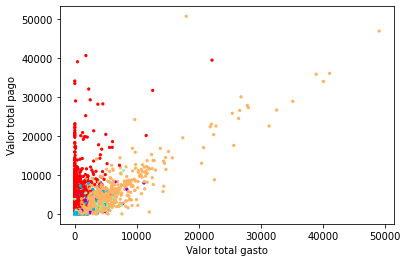

In [88]:
import matplotlib.pyplot as plt
plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total gasto")
plt.ylabel("Valor total pago")
plt.show

In [89]:
import seaborn as sns
df['cluster'] = labels
sns.pairplot(df[0:], hue='cluster')

Output hidden; open in https://colab.research.google.com to view.

In [90]:
df.groupby("cluster").describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0         412.0  1987.146873  1852.215743  ...         0.000000  0.000000  1.0
1        3281.0   443.767052   846.269966  ...         0.000000  0.444444  1.0
2        2648.0  3038.132314  2479.290949  ...         0.000000  0.000000  0.6
3        1538.0  1143.712630  1664.669654  ...         0.083333  0.545455  1.0
4        1071.0  1795.836702  1983.632225  ...         0.083333  0.142857  1.0

[5 rows x 128 columns]

In [91]:
centroides = kmeans.cluster_centers_
centroides

array([[3.33483624e-01, 2.68969713e-04, 1.59146477e-01, 3.61931219e-02,
        1.23336164e-01, 5.80731211e-02, 1.67333390e-04, 2.64804728e-05,
        1.47698430e-04, 1.92281888e-05, 4.25862512e-04, 3.87053484e-03,
        3.77114118e-01, 2.52735252e-01, 6.78741705e-01, 4.21940580e-06],
       [6.90371516e-02, 2.30796174e-04, 1.21563741e-01, 4.80009850e-02,
        7.36630157e-02, 2.42082092e-02, 1.72935684e-04, 3.36988039e-05,
        1.40371107e-04, 7.92073693e-06, 1.23895820e-04, 2.86522350e-03,
        9.43580038e-01, 1.53886761e-01, 5.68500273e-02, 7.61825260e-05],
       [5.04051566e-01, 2.72123953e-04, 6.16763508e-02, 3.62560254e-02,
        2.54420385e-02, 2.52917433e-01, 6.71318568e-05, 2.56858533e-05,
        4.48805835e-05, 5.74313497e-05, 1.15687738e-03, 1.32816939e-03,
        7.19419015e-01, 1.66067078e-01, 1.79058263e-01, 5.52303554e-07],
       [1.59893172e-01, 2.45101382e-04, 4.38385714e-01, 2.57205740e-01,
        1.81351596e-01, 2.60404572e-02, 2.04213900e-04, 8.903

In [92]:
max = len(centroides[0])
for i in range(max):
  print(df.columns.values[i], "\n{:.4f}".format(centroides[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0540
PRC_FULL_PAYMENT 
0.0000


In [93]:
colunas = [ df.columns.values[i] for i in range(max) if centroides[:, i].var() >= 0.01 ]
colunas

['BALANCE',
 'PURCHASES',
 'CASH_ADVANCE',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS']

In [94]:
description = df.groupby("cluster")[colunas]
n_clientes = description.size()
mean = description.mean()
mean['n_clientes'] = n_clientes
mean

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,n_clientes
cluster,,,,,,,
0,1987.146873,858.326286,420.107194,2226.699029,1338.974045,6032.349113,412
1,443.767052,629.212624,141.652025,5129.746043,814.456295,228.508769,3281
2,3038.132314,385.096760,1636.114441,4496.336858,968.599396,1021.861431,2648
3,1143.712630,3274.692952,186.045097,4103.875261,3046.004076,541.711158,1538
4,1795.836702,470.954463,3272.160223,3975.416631,4704.149015,735.583216,1071


CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior numero de clientes

CLUSTER 1: Clientes que mais gastam. O foco deles é saque. Piores pagadores. Boa Quantidade de clientes

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores

CLUSTER 3: Clientes que gastam muito com saques. Pagam ás vezes

CLUSTER 4: Clientes com o menor limite Não são bons pagadores. Menor quantidade de clientes

In [96]:
df.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
1,3281.0,0.246761,0.346705,0.0,0.0,0.000000,0.444444,1.0
2,2648.0,0.001800,0.023264,0.0,0.0,0.000000,0.000000,0.6
3,1538.0,0.278149,0.366934,0.0,0.0,0.083333,0.545455,1.0
4,1071.0,0.117296,0.186974,0.0,0.0,0.083333,0.142857,1.0
